00001 video_combined_filtered.csv

In [1]:
import pandas as pd

# load data
df = pd.read_csv('train/00001/video_combined_filtered.csv')
df

,t,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,bb_3d_brb_x,bb_3d_brb_y,bb_3d_brb_z,bb_3d_flt_x,bb_3d_flt_y,bb_3d_flt_z,room
0,75.705,280.039154,117.408844,307.0,169.0,266.0,72.0,1017.734375,21.968750,2417.781250,1261.782349,-420.594055,2447.781250,887.554260,401.911316,2387.781250,living_room
1,75.751,286.778564,109.800583,307.0,169.0,262.0,74.0,1053.634766,84.765625,2370.007812,1237.156128,-412.385315,2400.007812,836.974121,377.458862,2340.007812,living_room
2,75.798,297.476990,117.436119,307.0,171.0,264.0,58.0,1144.165771,21.338135,2373.364746,1238.886597,-429.817719,2403.364746,854.609497,509.478729,2343.364746,living_room
3,75.830,296.249634,104.325584,307.0,171.0,264.0,38.0,1117.765625,128.589844,2339.488281,1221.423950,-423.759247,2369.488281,842.255005,664.085693,2309.488281,living_room
4,75.861,296.411377,102.132950,307.0,173.0,262.0,26.0,1112.454956,145.708405,2325.612061,1214.270996,-437.798431,2355.612061,821.094604,756.694946,2295.612061,living_room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24173,1787.839,302.178894,161.720963,307.0,175.0,296.0,150.0,1149.203735,-337.222229,2304.981445,1203.636353,-450.340149,2334.981445,1084.953857,-239.328049,2274.981445,living_room
24174,1787.902,302.767456,161.246674,307.0,175.0,296.0,150.0,1160.065186,-335.152191,2317.174072,1209.921387,-452.691681,2347.174072,1090.768677,-240.610718,2287.174072,living_room
24175,1787.933,303.215912,159.739334,307.0,171.0,298.0,152.0,1161.612915,-322.322571,2313.000000,1207.769775,-419.022064,2343.000000,1104.789307,-256.183044,2283.000000,living_room
24176,1787.980,304.381134,158.599365,307.0,163.0,302.0,156.0,1182.000000,-316.000000,2334.600098,1218.904175,-356.550171,2364.600098,1147.567993,-290.932678,2304.600098,living_room


In [15]:
# position change -2D
df['delta_x'] = df['centre_2d_x'].diff()
df['delta_y'] = df['centre_2d_y'].diff()
df['delta_t'] = df['t'].diff()

df['v_2d'] = (df['delta_x']**2 + df['delta_y']**2)**0.5 / df['delta_t']
df['v_x_2d'] = df['delta_x'] / df['delta_t']
df['v_y_2d'] = df['delta_y'] / df['delta_t']


df['acc_2d'] = df['v_2d'].diff() / df['delta_t']
df['acc_x_2d'] = df['v_x_2d'].diff() / df['delta_t']
df['acc_y_2d'] = df['v_y_2d'].diff() / df['delta_t']

df

,t,centre_2d_x,centre_2d_y,bb_2d_br_x,bb_2d_br_y,bb_2d_tl_x,bb_2d_tl_y,centre_3d_x,centre_3d_y,centre_3d_z,...,room,delta_x,delta_y,delta_t,v_2d,acc_2d,v_x_2d,v_y_2d,acc_x_2d,acc_y_2d
0,75.705,280.039154,117.408844,307.0,169.0,266.0,72.0,1017.734375,21.968750,2417.781250,...,living_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75.751,286.778564,109.800583,307.0,169.0,262.0,74.0,1053.634766,84.765625,2370.007812,...,living_room,6.739410,-7.608261,0.046,220.954804,NaN,146.508922,-165.396981,NaN,NaN
2,75.798,297.476990,117.436119,307.0,171.0,264.0,58.0,1144.165771,21.338135,2373.364746,...,living_room,10.698425,7.635536,0.047,279.653893,1248.916796,227.626070,162.458217,1725.896773,6975.642500
3,75.830,296.249634,104.325584,307.0,171.0,264.0,38.0,1117.765625,128.589844,2339.488281,...,living_room,-1.227356,-13.110535,0.032,411.495607,4120.053559,-38.354874,-409.704208,-8311.904491,-17880.075790
4,75.861,296.411377,102.132950,307.0,173.0,262.0,26.0,1112.454956,145.708405,2325.612061,...,living_room,0.161743,-2.192635,0.031,70.922326,-10986.234871,5.217521,-70.730148,1405.561131,10934.647114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24173,1787.839,302.178894,161.720963,307.0,175.0,296.0,150.0,1149.203735,-337.222229,2304.981445,...,living_room,0.653442,0.369675,0.031,24.218188,-123.576928,21.078787,11.924990,283.327609,-428.563971
24174,1787.902,302.767456,161.246674,307.0,175.0,296.0,150.0,1160.065186,-335.152191,2317.174072,...,living_room,0.588562,-0.474289,0.063,11.998102,-193.969613,9.342254,-7.528396,-186.294165,-308.783899
24175,1787.933,303.215912,159.739334,307.0,171.0,298.0,152.0,1161.612915,-322.322571,2313.000000,...,living_room,0.448456,-1.507339,0.031,50.730203,1249.422607,14.466316,-48.623854,165.292332,-1325.659944
24176,1787.980,304.381134,158.599365,307.0,163.0,302.0,156.0,1182.000000,-316.000000,2334.600098,...,living_room,1.165222,-1.139969,0.047,34.683277,-341.423957,24.791961,-24.254657,219.694565,518.493559


In [3]:
v_2d_average = df['v_2d'].mean()
acc_2d_max = df['acc_2d'].max()

print(f'average velocity 2d: {v_2d_average}.')
print(f'max accleration: {acc_2d_max}.')

average velocity 2d: 15.89346345947011.
max accleration: 1675.8531922299478.


In [7]:
import matplotlib.pyplot as plt

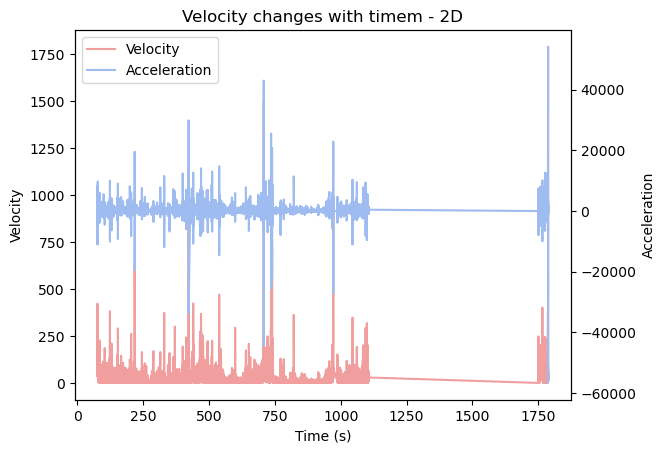

In [18]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity')
ax1.plot(df['t'], df['v_2d'], label='Velocity', color='#F09E9E')

ax2 = ax1.twinx()
ax2.set_ylabel('Acceleration')
ax2.plot(df['t'], df['acc_2d'], label='Acceleration', color='#9EBCF0')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

handle = h1 + h2
label = l1 + l2

plt.title('Velocity and accleration changes with timem - 2D')

plt.legend(handle, label)

plt.show()

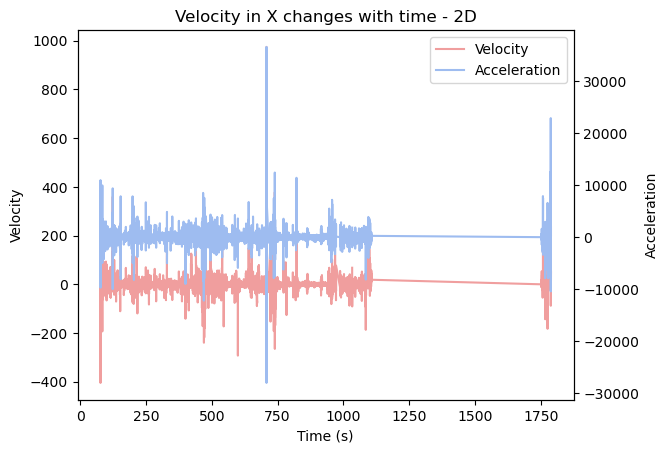

In [19]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity')
ax1.plot(df['t'], df['v_x_2d'], label='Velocity', color='#F09E9E')

ax2 = ax1.twinx()
ax2.set_ylabel('Acceleration')
ax2.plot(df['t'], df['acc_x_2d'], label='Acceleration', color='#9EBCF0')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

handle = h1 + h2
label = l1 + l2

plt.title('Velocity and acceleration in X changes with time - 2D')

plt.legend(handle, label)

plt.show()

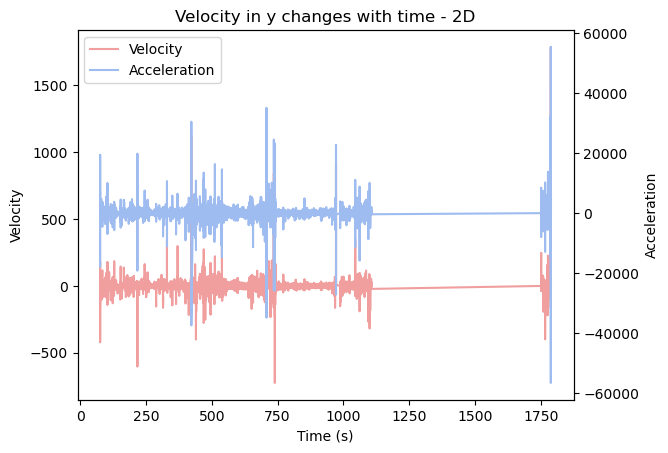

In [20]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity')
ax1.plot(df['t'], df['v_y_2d'], label='Velocity', color='#F09E9E')

ax2 = ax1.twinx()
ax2.set_ylabel('Acceleration')
ax2.plot(df['t'], df['acc_y_2d'], label='Acceleration', color='#9EBCF0')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

handle = h1 + h2
label = l1 + l2

plt.title('Velocity and acceleration in y changes with time - 2D')

plt.legend(handle, label)

plt.show()